In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
file="data_batch_1"
a=unpickle(file)

In [5]:
a

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

In [6]:
b=a[b'data']
b[1].shape
single=np.array(b[1])
single_img_reshaped = np.transpose(np.reshape(single,(3, 32,32)), (1,2,0))
single_img_reshaped.shape

(32, 32, 3)

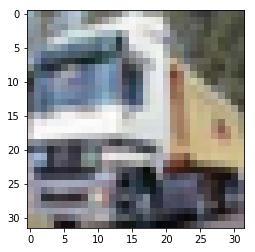

In [7]:
# plt.plot(single_img_reshaped)
# plt.show()
plt.imshow(single_img_reshaped)

In [97]:
a=unpickle('data_batch_1')
Xte=a[b'data']
Yte=a[b'labels']
b=unpickle('test_batch')
Xtr=b[b'data']
Ytr=b[b'labels']
# flatten out all images to be one-dimensional
Xtr_rows = Xtr.reshape(Xtr.shape[0], 32 * 32 * 3) # Xtr_rows becomes 50000 x 3072
Xte_rows = Xte.reshape(Xte.shape[0], 32 * 32 * 3) # Xte_rows becomes 10000 x 3072

In [98]:
Xtr_rows=Xtr_rows[:100]
Xte_rows=Xte_rows[:100]
Yte=Yte[:100]
Ytr=Ytr[:100]
Xtr_rows.shape

(100, 3072)

In [99]:
# import numpy as np

# class NearestNeighbor(object):
#     def __init__(self):
#         pass

#     def train(self, X, y): 
#         self.Xtr = X
#         self.ytr = y
#     def predict(self, X):
#         num_test = X.shape[0]
#         Ypred = np.zeros(num_test)
#         for i in range(num_test):
#             distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
#             min_index = np.argmin(distances) # get the index with smallest distance
#             Ypred[i] = self.ytr[min_index] # predict the label of the nearest example
#             print(distances)
#         return Ypred

In [103]:
# using distance
import numpy as np

class NearestNeighbor(object):
    def __init__(self):
        pass

    def train(self, X, y): 
        self.Xtr = X
        self.ytr = y
    def predict(self, X):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test)
        for i in range(num_test):
            distances = np.sqrt(np.sum(np.square(self.Xtr - X[i,:]), axis = 1))
            min_index = np.argmin(distances) # get the index with smallest distance
            Ypred[i] = self.ytr[min_index] # predict the label of the nearest example
            print(distances)
        return Ypred

In [104]:
nn = NearestNeighbor() # create a Nearest Neighbor classifier class
nn.train(Xtr_rows, Ytr) # train the classifier on the training images and labels
Yte_predict = nn.predict(Xte_rows) # predict labels on the test images
# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print('accuracy: %f' % ( np.mean(Yte_predict == Yte) ))

[620.82061498 740.65957281 705.61514961 652.29341112 624.37642856
 685.98095255 795.05738329 777.06968718 543.7639405  703.36748326
 621.39469473 644.56123396 766.01596048 805.61223747 686.73514327
 607.15754584 648.00581555 652.74545803 801.6538983  688.70464594
 672.53386665 756.28735295 720.84790901 720.87791755 556.45835899
 651.959926   727.36922484 689.84279668 627.6194877  811.84178747
 865.11994251 520.10283426 562.37406434 704.33872468 722.23514738
 754.07461554 587.1920203  691.34453609 642.65301665 640.69903337
 641.28936166 836.09337847 658.32718968 739.66298004 751.72937444
 627.85227318 683.950528   689.64191205 615.77682944 721.8069134
 751.05527349 699.0728586  869.4611124  789.0012333  695.76466756
 606.35328848 650.54794948 816.82833532 572.72592639 570.09962375
 507.13070056 683.06690766 859.29643914 752.53050083 591.01938667
 762.82481914 633.86527824 739.30735796 715.9637999  808.66336607
 527.48534678 704.46555603 617.77362511 635.70811331 749.09637479
 571.030867

[690.4917801  637.47894461 655.03882008 658.0980068  682.67325306
 706.59908099 706.280526   775.82273352 583.69189335 686.05695889
 555.01254295 647.61122698 633.88830838 719.87363514 695.68137474
 719.94013517 653.65484217 758.32728117 673.5304242  687.86479433
 698.86883943 649.62457688 890.26107824 719.53411659 687.54699967
 695.03483193 782.79744937 696.52401626 710.59773982 734.47486018
 775.0890367  655.70880583 644.51237766 792.3530731  743.15982766
 677.3016371  675.14112963 654.16693656 653.21860152 646.21198667
 693.28056776 740.20050687 792.56884978 787.10382564 683.23090518
 651.38221419 734.63292014 776.6121501  724.87167267 740.12382318
 738.64635154 774.39240694 717.17362464 773.01332849 707.17289346
 618.04996179 655.28727517 727.16621561 598.34282307 628.75633718
 685.11091827 739.98081254 662.64650606 643.96273597 721.69345847
 718.86970903 660.0139791  642.37668156 794.77709071 703.19818485
 620.29391171 734.1931016  579.65198125 687.94061617 705.07886401
 708.94825

In [94]:
X=np.array([1,2,3])
Xtr=np.array([[1,1,1],[2,2,2]])
distances = np.sum(np.abs(Xtr - X), axis = 1)

In [95]:
distances

array([3, 2])

In [96]:
np.argmin(distances)

1